In [8]:
# see https://epic.gsfc.nasa.gov/about/api

In [22]:
import requests
import pandas as pd

In [3]:
resp = requests.get("https://epic.gsfc.nasa.gov/api/natural")

In [7]:
resp.json()

[{'identifier': '20231113005515',
  'caption': "This image was taken by NASA's EPIC camera onboard the NOAA DSCOVR spacecraft",
  'image': 'epic_1b_20231113005515',
  'version': '03',
  'centroid_coordinates': {'lat': -11.733398, 'lon': 158.90625},
  'dscovr_j2000_position': {'x': -1092763.275001,
   'y': -1061459.706249,
   'z': -316946.044742},
  'lunar_j2000_position': {'x': -270487.736574,
   'y': -249762.344397,
   'z': -122292.296099},
  'sun_j2000_position': {'x': -95089946.00011,
   'y': -104141319.599918,
   'z': -45143405.150246},
  'attitude_quaternions': {'q0': -0.18984,
   'q1': -0.184135,
   'q2': 0.33911,
   'q3': 0.902805},
  'date': '2023-11-13 00:50:27',
  'coords': {'centroid_coordinates': {'lat': -11.733398, 'lon': 158.90625},
   'dscovr_j2000_position': {'x': -1092763.275001,
    'y': -1061459.706249,
    'z': -316946.044742},
   'lunar_j2000_position': {'x': -270487.736574,
    'y': -249762.344397,
    'z': -122292.296099},
   'sun_j2000_position': {'x': -95089946

In [10]:
resp = requests.get("https://epic.gsfc.nasa.gov/api/natural/all")

In [11]:
len(resp.json())

2704

In [51]:
images = []

resp = requests.get("https://epic.gsfc.nasa.gov/api/natural/all")
for entry in resp.json()[:10]:
    date = entry["date"]
    url = "https://epic.gsfc.nasa.gov/api/natural/date/" + date
    metadata = requests.get(url)
    for data in metadata.json():
        name = data["image"]
        coordinates = data["centroid_coordinates"]
        # print(name, coordinates)
        images.append({"name": name, "lat": coordinates["lat"], "lon": coordinates["lon"], "date": date})

df_images = pd.DataFrame(images)

<Axes: xlabel='lon', ylabel='lat'>

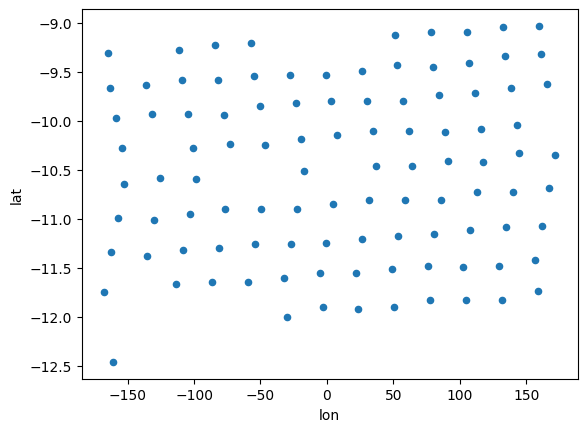

In [52]:
df_images.plot.scatter("lon", "lat")

In [53]:
df_images.describe()

,lat,lon
count,103.000000,103.000000
mean,-10.515943,8.854767
std,0.875858,101.756590
min,-12.458496,-167.570801
25%,-11.257324,-79.497071
50%,-10.458984,21.672363
75%,-9.766846,96.807862
max,-9.030762,171.892090


In [44]:
from math import sin, cos, sqrt, atan2, radians

def distance(lat1,lon1,lat2,lon2):
    dlon = radians(lon2) - radians(lon1)
    dlat = radians(lat2) - radians(lat1)
    
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    R = 6373.0
    
    distance_haversine_formula = R * c
    return distance_haversine_formula

In [56]:
lat = 52.531677
lon = 13.381777

idxmin = df_images.apply(lambda x: distance(lat,lon,x.lat,x.lon), axis=1).idxmin()
image = df_images.iloc[idxmin]

In [59]:
image["name"]

'epic_1b_20231108110606'

In [72]:
url = "https://epic.gsfc.nasa.gov/archive/natural/" + image["date"].replace("-", "/") + "/jpg/" + image["name"] + ".jpg"
url

'https://epic.gsfc.nasa.gov/archive/natural/2023/11/08/jpg/epic_1b_20231108110606.jpg'

In [77]:
from IPython.display import Image
Image(url=url)

In [82]:
def get_metadata():
    images = []
    resp = requests.get("https://epic.gsfc.nasa.gov/api/natural/all")
    for entry in resp.json()[:]:
        date = entry["date"]
        url = "https://epic.gsfc.nasa.gov/api/natural/date/" + date
        metadata = requests.get(url)
        for data in metadata.json():
            name = data["image"]
            coordinates = data["centroid_coordinates"]
        # print(name, coordinates)
            images.append({"name": name, "lat": coordinates["lat"], "lon": coordinates["lon"], "date": date})
    return images        

images = get_metadata()

df_images = pd.DataFrame(images)

In [83]:
df_images.to_csv("epic_earth.csv")

In [84]:
df_images.describe()

,lat,lon
count,40508.000000,40508.000000
mean,4.295223,3.570376
std,16.941087,101.984464
min,-29.274902,-179.963379
25%,-9.631348,-84.407959
50%,8.635254,5.170898
75%,19.431152,91.406250
max,26.770020,180.000000


In [98]:
len(df_images.lat.unique())

5634

In [88]:
len(df_images.lon.unique())

22904

In [96]:
len(df_images.round(1).lat.unique())

562

In [97]:
len(df_images.round(1).lon.unique())

3601

In [117]:
df_images.round(-1).describe()

,lat,lon
count,40508.000000,40508.000000
mean,4.074998,3.576824
std,17.163828,102.065306
min,-30.000000,-180.000000
25%,-10.000000,-80.000000
50%,10.000000,10.000000
75%,20.000000,90.000000
max,30.000000,180.000000


In [120]:
df_images_rounded = df_images.round(0).sort_values("date").groupby(["lat", "lon"]).tail(1)

In [121]:
df_images_rounded.to_csv("epic_earth_rounded.csv")